In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# df = pd.read_csv("./results/mdi_local.real_data_regression/diabetes_regression/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_classification/diabetes_classification/varying_sample_row_n/seed331/results.csv")
df = pd.read_csv("./results/mdi_local.real_data_classification/fico/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/satellite_image/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_classification/juvenile/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/ca_housing/varying_sample_row_n/seed331/results.csv")

In [3]:
pd.set_option('display.max_columns', None)
df

,sample_row_n,sample_row_n_name,rep,n_estimators,min_samples_leaf,max_features,random_state,include_raw,model,fi,splitting_strategy,train_size,num_features,ablation_seed,fi_time,AUC_before_ablation,AUC_after_ablation_1,AUC_after_ablation_2,AUC_after_ablation_3,AUC_after_ablation_4,AUC_after_ablation_5,AUC_after_ablation_6,AUC_after_ablation_7,AUC_after_ablation_8,AUC_after_ablation_9,AUC_after_ablation_10,AUC_after_ablation_11,AUC_after_ablation_12,AUC_after_ablation_13,AUC_after_ablation_14,AUC_after_ablation_15,AUC_after_ablation_16,AUC_after_ablation_17,AUC_after_ablation_18,AUC_after_ablation_19,AUC_after_ablation_20,AUC_after_ablation_21,AUC_after_ablation_22,AUC_after_ablation_23,ablation_time,test_size,split_seed,index,var,true_support
0,NaN,keep_all_rows,0,100,1,sqrt,42,NaN,RF,LFI_with_raw,train-test,7007,23,98471,2711.613607,0.790763,0.762746,0.726802,0.695440,0.669725,0.647991,0.627655,0.611676,0.597204,0.581380,0.567756,0.556634,0.544751,0.539974,0.529198,0.520858,0.514980,0.507789,0.504722,0.505502,0.508782,0.502994,0.503713,0.503784,1.312838,3452,331,0,0,1.0
1,NaN,keep_all_rows,0,100,1,sqrt,42,False,RF,LFI_without_raw,train-test,7007,23,98471,2145.821211,0.790763,0.754116,0.717071,0.691099,0.671225,0.653670,0.633513,0.612388,0.587288,0.568322,0.553082,0.544344,0.531371,0.523916,0.514427,0.508516,0.506669,0.501863,0.499323,0.497787,0.499243,0.503372,0.500460,0.503784,1.339416,3452,331,1,0,1.0
2,NaN,keep_all_rows,0,100,1,sqrt,42,NaN,RF,LIME,train-test,7007,23,98471,290.463717,0.790763,0.760642,0.721323,0.690002,0.657033,0.630492,0.610588,0.587707,0.571516,0.559783,0.554560,0.544864,0.542841,0.535868,0.532582,0.527743,0.521808,0.517290,0.516208,0.512895,0.513142,0.507567,0.504672,0.503784,1.227816,3452,331,2,0,1.0
3,NaN,keep_all_rows,0,100,1,sqrt,42,NaN,RF,TreeSHAP,train-test,7007,23,98471,129.804375,0.790763,0.752699,0.706904,0.671966,0.640850,0.622580,0.597449,0.576216,0.556926,0.542072,0.531371,0.525363,0.519954,0.513366,0.509602,0.507937,0.506544,0.501969,0.503890,0.500756,0.502845,0.504801,0.503764,0.503784,1.143456,3452,331,3,0,1.0
4,NaN,keep_all_rows,1,100,1,sqrt,42,NaN,RF,LFI_with_raw,train-test,7007,23,99343,3061.657162,0.790763,0.756936,0.715862,0.676874,0.648172,0.626527,0.609243,0.596662,0.584756,0.570388,0.558712,0.544283,0.532103,0.528801,0.519872,0.514953,0.518159,0.512480,0.512831,0.511755,0.508450,0.506872,0.502952,0.504603,1.420182,3452,331,4,0,1.0
5,NaN,keep_all_rows,1,100,1,sqrt,42,False,RF,LFI_without_raw,train-test,7007,23,99343,2572.089320,0.790763,0.747921,0.709027,0.680984,0.660001,0.638875,0.614161,0.594410,0.575326,0.568948,0.558802,0.553817,0.548072,0.535724,0.531919,0.525004,0.519471,0.516404,0.514804,0.513450,0.511339,0.508354,0.505548,0.504603,1.462942,3452,331,5,0,1.0
6,NaN,keep_all_rows,1,100,1,sqrt,42,NaN,RF,LIME,train-test,7007,23,99343,302.052908,0.790763,0.752481,0.712462,0.665572,0.627142,0.601035,0.589246,0.572683,0.562294,0.549254,0.545781,0.540043,0.540053,0.536425,0.528351,0.520155,0.514814,0.508124,0.508295,0.508581,0.504583,0.503969,0.506073,0.504603,1.187382,3452,331,6,0,1.0
7,NaN,keep_all_rows,1,100,1,sqrt,42,NaN,RF,TreeSHAP,train-test,7007,23,99343,132.717374,0.790763,0.743080,0.693637,0.657224,0.625098,0.605215,0.581139,0.561703,0.547607,0.538148,0.527914,0.521425,0.515176,0.509247,0.511461,0.511596,0.507992,0.504475,0.506993,0.506086,0.502914,0.503329,0.503320,0.504603,1.263167,3452,331,7,0,1.0


In [4]:
# Print the run-time of the feature importance algorithm
df[["fi","fi_time"]]

,fi,fi_time
0,LFI_with_raw,2711.613607
1,LFI_without_raw,2145.821211
2,LIME,290.463717
3,TreeSHAP,129.804375
4,LFI_with_raw,3061.657162
5,LFI_without_raw,2572.089320
6,LIME,302.052908
7,TreeSHAP,132.717374


In [5]:
#################### Change the following according to the dataset ####################
task = "classification" #"regression" "classification"
########################################################################################
methods = ["LFI_with_raw","LFI_without_raw","TreeSHAP", "LIME"]
nreps = df["rep"].max()
n_testsize = df[['train_size', 'test_size']].drop_duplicates()
num_features = df['num_features'].drop_duplicates()[0]
metrics = {"regression": "MSE", "classification": "AUC"}
results = {}

for m in methods:
    results[m] = {}
    for r in range(nreps+1):
        results[m][r] = []

In [6]:
for m in methods:
    for r in range(nreps+1):
        df_sub = df[(df["fi"] == m) & (df["rep"] == r)]
        assert len(df_sub[metrics[task]+"_before_ablation"].unique()) == 1
        results[m][r].append(df_sub[metrics[task]+"_before_ablation"].unique()[0])
        for i in range(num_features):
            assert len(df_sub[metrics[task]+f"_after_ablation_{i+1}"].unique()) == 1
            results[m][r].append(df_sub[metrics[task]+f"_after_ablation_{i+1}"].unique()[0])

In [7]:
agg_results = {} 
for m in methods:
    agg_results[m] = None

In [8]:
for m in methods:
    result = []
    for f in range(num_features+1):
        result.append(np.mean([results[m][r][f] for r in range(nreps+1)]))          
    agg_results[m] = result

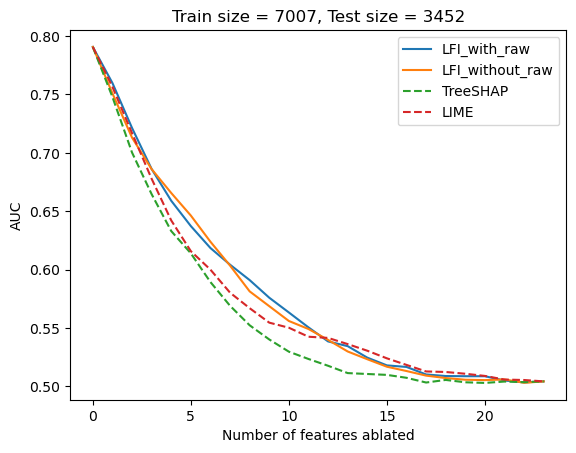

In [9]:
# Plotting
fig, ax = plt.subplots()
for m in methods:
    if m in ["TreeSHAP", "LIME"]:
        ax.plot(range(num_features+1), agg_results[m], label=m, linestyle='dashed')
    else:
        ax.plot(range(num_features+1), agg_results[m], label=m)
ax.set(xlabel='Number of features ablated', ylabel=metrics[task],
        title=f'Train size = {n_testsize["train_size"].values[0]}, Test size = {n_testsize["test_size"].values[0]}')
ax.legend()
plt.savefig(f"ablation_fico.png")
plt.show()